Modelling of Valve as RC circuit 

## Diagram 

![title](img/valveDiagram.PNG)

In [1]:
import matplotlib.pyplot as plt
#plt.xkcd() #to make the diagram look hand drawn
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import SchemDraw as schem
import SchemDraw.elements as e


ModuleNotFoundError: No module named 'SchemDraw'

## Equilibrium Equations

In [212]:
Math (r' \Delta P= R Q')

<IPython.core.display.Math object>

In [223]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
P_i -P_o= R q \\
C = \frac{dm}{dP_o} \\
q =  dm/dt \\
C = \frac{\Delta V}{\Delta P}\\


\end{eqnarray}""")

<IPython.core.display.Latex object>

In [229]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
A =[-\frac{1}{RC}]   \quad
B =[\frac{1}{RC}]\\[0.1in]
C =[1]   \quad
D = [0]\\
\end{eqnarray}""")

<IPython.core.display.Latex object>

In [3]:
from IPython.display import Math
Math (r' R=\frac{8nL}{\pi r^4}')

<IPython.core.display.Math object>

In [4]:
from IPython.display import Math
Math (r' L=\frac{\rho L}{\pi r^2}')

<IPython.core.display.Math object>

## Differential Equation

In [5]:
from IPython.display import Math
Math (r' RC\frac{dP_o(t)}{dt}+P_o=P_i')


<IPython.core.display.Math object>

In [6]:
from IPython.display import Math
Math (r' \frac{dP_o(t)}{dt}=\frac{1}{RC}P_i(t)-\frac{1}{RC}P_o(t)')


<IPython.core.display.Math object>

In [11]:
from IPython.display import Math
Math (r' \frac{dP_o(t)}{dt}=\frac{1}{RC}P_i(t)-\frac{1}{RC}P_o(t)')

<IPython.core.display.Math object>

In [ ]:
####Inetial effect liquids


In [49]:
from IPython.display import Math
Math (r' P_i(t) = \frac{LCd^2P_o(t)}{dt^2}-\frac{R_cC_ddP_o(t)}{dt}+P_o(t)')

<IPython.core.display.Math object>

In [48]:
from IPython.display import Math
Math (r' \frac{d^2 P_o}{dt^2} = \frac{R}{L}\frac{dP_o(t)}{dt}-\frac{P_o(t)}{LC} +\frac{P_i}{LC}')

<IPython.core.display.Math object>

In [47]:
from IPython.display import Latex
Latex(r"""\begin{eqnarray}
A =\begin{bmatrix}
0 & 1 \\
-\frac{1}{RC} & -R/L 
\end{bmatrix}

B =\begin{bmatrix}
0 \\ \frac{1}{LC}  
\end{bmatrix}\\[0.1in]
C =[1 & \quad 0]   \quad
D = [0]\\
\end{eqnarray}""")

<IPython.core.display.Latex object>

In [12]:
import numpy as np
import math
import control
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import ss2tf

In [13]:
# RC problem
#defining circuit properties
# RC problem
#defining circuit properties

# Resistance
nu =   1.8e-05 #air  #water 0.001  #Pa s
lenghtValve = 800e-6 + 725e-6 #1.0 #m
lenghtTube = 0.6
r =150e-6 #3.0e-4 #m
rho = 1000.0
# it would be better to use Pressure/Flowrate

#R = 47e3
#C = 1000e-9
Rvalv = 8.0*nu*lenghtValve/(math.pi*pow(r,4.0))   #5.6e9 #47e3
Rcommon = 8.0*nu*lenghtTube/(math.pi*pow(r,4.0))   #5.6e9 #47e3
RLoss = Rcommon*0.1

R = Rvalv + Rcommon + RLoss

In [15]:

#capacitance
#Cap = 1/(.49e15)  #2.07e-12 #1000e-9
#Cap = deltaP/deltaVol  pressure  needed to raise 1 volume
volChamber = 100e-6*600e-6*450e-6 #100e-6*2e-3*1e-3# 0.0001*0.00002*0.001
Percentage_Expansion = 1.3 #1.5 #0.5
volTube = (lenghtValve+lenghtTube)*(3.1416*pow(r,2.0))
dV =   volTube + volChamber 
dP = 40e3
V1 = volChamber + volTube
V2 = V1*Percentage_Expansion
dV = abs(V2-V1)
Cap = dV/dP

In [18]:
print('vol chamber: ',format(volChamber,"10.2E"))
print('vol Tube: ',format(volTube,"10.2E"))
print('vol Tot: ',format(dV,"10.2E"))
print('vol 1: ',format(V1,"10.2E"))
print('vol 2: ',format(V2,"10.2E"))
print('dV: ',format(dV,"10.2E"))
print('R: ',format(R,"10.2E"))
print('C: ',format(Cap,"5.2e"))
print('freq ', 1/(2*3.1416*R*Cap)) # 1/(2*3.1416*pow(L*Cap,0.5)))
print('rc [s]: ',R*Cap)
print('5 *t [s]: ',5*R*Cap)


vol chamber:    2.70E-11
vol Tube:    4.25E-08
vol Tot:    1.28E-08
vol 1:    4.25E-08
vol 2:    5.53E-08
dV:    1.28E-08
R:    5.99E+10
C:  3.19e-13
freq  8.327242816194834
rc [s]:  0.019112517123885564
5 *t [s]:  0.09556258561942782


In [19]:

Tau = R*Cap
print('Tau', Tau)
print('5 *Tau',5*Tau)
C =Cap
#state space matrix
A = [-1/(R*C)]
B = [1/(R*C)]
C = [1.0]
D = [0.0]

sys1 = signal.StateSpace(A,B,C,D)   # state space
t1,y1 = signal.step(sys1)           # step response


Tau 0.019112517123885564
5 *Tau 0.09556258561942782


In [20]:
import matplotlib.pyplot as plt

C:\Users\E90041\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


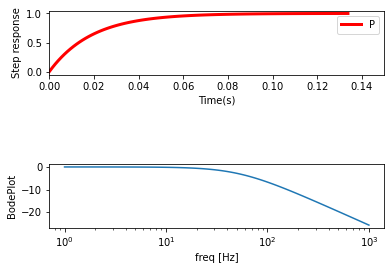

In [21]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(t1,y1,'r-',linewidth=3)
plt.ylabel('Step response')
plt.xlabel('Time(s)')
plt.xlim(0, 0.15)
plt.legend(['P'],loc='best')

a= ss2tf(A, B, C, D)  #getting transfer function
sys = signal.TransferFunction(a[0], a[1])
w, mag, phase = signal.bode(sys)
plt.subplot(3,1,3)
plt.semilogx(w, mag)    # Bode magnitude plot
plt.ylabel('BodePlot')
plt.xlabel('freq [Hz]')
plt.show()




#  Valve 2 Longer Input tube and Smaller  chamber

In [27]:
#Valve with longer input tube (more resistance)
# RC problem
#defining circuit properties
# RC problem
#defining circuit properties

# Resistance
nu =   1.8e-05 #air  #water 0.001  #Pa s
lenghtValve = 800e-6 + 725e-6 #1.0 #m
lenghtTube = 0.6
lenghtTube2 = 40e-3

r =150e-6 #3.0e-4 #m
rho = 1000.0
# it would be better to use Pressure/Flowrate

#R = 47e3
#C = 1000e-9
Rvalv = 8.0*nu*lenghtValve/(math.pi*pow(r,4.0))   #5.6e9 #47e3
Rcommon = 8.0*nu*lenghtTube/(math.pi*pow(r,4.0))   #5.6e9 #47e3
RTube2 = 8.0*nu*lenghtTube2/(math.pi*pow(r,4.0))   #5.6e9 #47e3
RLoss = Rcommon*0.1

R = Rvalv + Rcommon + RLoss +RTube2

In [28]:
#capacitance
#Cap = 1/(.49e15)  #2.07e-12 #1000e-9
#Cap = deltaP/deltaVol  pressure  needed to raise 1 volume
volChamber = 100e-6*500e-6*450e-6 #100e-6*2e-3*1e-3# 0.0001*0.00002*0.001
Percentage_Expansion = 1.3 #1.5 #0.5
volTube = (lenghtValve+lenghtTube+lenghtTube2)*(3.1416*pow(r,2.0))
dV =   volTube + volChamber 
dP = 40e3
V1 = volChamber + volTube
V2 = V1*Percentage_Expansion
dV = abs(V2-V1)
Cap = dV/dP

In [30]:
print('vol chamber: ',format(volChamber,"10.2E"))
print('vol Tube: ',format(volTube,"10.2E"))
print('vol Tot: ',format(dV,"10.2E"))
print('vol 1: ',format(V1,"10.2E"))
print('vol 2: ',format(V2,"10.2E"))
print('dV: ',format(dV,"10.2E"))
print('R: ',format(R,"10.2E"))
print('C: ',format(Cap,"5.2e"))
print('freq ', 1/(2*3.1416*R*Cap)) # 1/(2*3.1416*pow(L*Cap,0.5)))
print('rc [s]: ',R*Cap)
print('5 *t [s]: ',5*R*Cap)

vol chamber:    2.25E-11
vol Tube:    4.53E-08
vol Tot:    1.36E-08
vol 1:    4.54E-08
vol 2:    5.90E-08
dV:    1.36E-08
R:    6.35E+10
C:  3.40e-13
freq  7.363845913034516
rc [s]:  0.021612968657799075
5 *t [s]:  0.10806484328899538


In [31]:

Tau = R*Cap
print('Tau', Tau)
print('5 *Tau',5*Tau)
C =Cap
#state space matrix
A = [-1/(R*C)]
B = [1/(R*C)]
C = [1.0]
D = [0.0]

sys1 = signal.StateSpace(A,B,C,D)   # state space
t2,y2 = signal.step(sys1)           # step response


Tau 0.021612968657799075
5 *Tau 0.10806484328899538


C:\Users\E90041\Anaconda3\lib\site-packages\scipy\signal\filter_design.py:1630: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  warnings.warn("Badly conditioned filter coefficients (numerator): the "


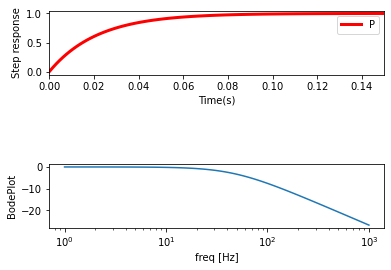

In [32]:
plt.figure()
plt.subplot(3,1,1)
plt.plot(t2,y2,'r-',linewidth=3)
plt.ylabel('Step response')
plt.xlabel('Time(s)')
plt.xlim(0, 0.15)
plt.legend(['P'],loc='best')

a= ss2tf(A, B, C, D)    #getting transfer function from State Space
sys = signal.TransferFunction(a[0], a[1]) #Step Response
w, mag, phase = signal.bode(sys)          #Freq. Response
plt.subplot(3,1,3)
plt.semilogx(w, mag)    # Bode magnitude plot
plt.ylabel('BodePlot')
plt.xlabel('freq [Hz]')
plt.show()

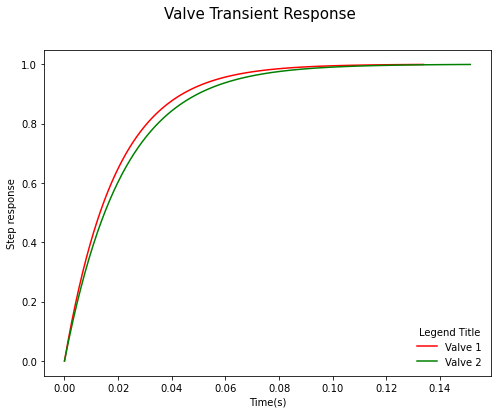

In [33]:
# Initialise the figure and axes.
fig, ax = plt.subplots(1, figsize=(8, 6))

# Set the title for the figure
fig.suptitle('Valve Transient Response', fontsize=15)

# Draw all the lines in the same plot, assigning a label for each one to be
# shown in the legend.
ax.plot(t1, y1, color="red", label="Valve 1")
ax.plot(t2, y2, color="green", label="Valve 2")
plt.ylabel('Step response')
plt.xlabel('Time(s)')

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Legend Title", frameon=False)

plt.show()